Importing python packages

In [1]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

Importing the master Form A dataset (variables extracted for main GUSTO cohort and IVF cohort)

In [3]:
file = '/home/mukkesh/Manuscript1_final2020/FormA392_20191206.xlsx'
df = pd.read_excel(file, index_col = "SubjectID")

Inspecting the dataset

In [4]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                        float64
bw_percentile_Lancet2011                                    float64
size_at_birth_Lancet2011                                     object
LGA_Lancet2011_bin                                          float64
children_at_home                                             object
working_situation                                            object
childcare_arr_1                                              object
childcare_arr_1_specify                                      object
childcare_arr_1_recoded                                      object
childcare_arr_2                                              object
childcare_arr_2_specify                                      object
childcare_arr_2_recoded                                      object
childcare_arr_3                                              object
childcare_arr_3_specify                                      object
childcare_arr_3_recoded                         

In [5]:
df.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04002                 -0.28                     39.05   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04010                 -0.77                     22.08   
010-04011                 -0.30                     38.33   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04002                      AGA                 0.0              NaN   
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04010                      AGA                 0.0              NaN   
010-04011                      AGA                 0.0              NaN   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04002               NaN             NaN                     NaN   
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04010               NaN             NaN                     NaN   
010-04011               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04002                     NaN                         8.0   
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04010                     NaN                         9.0   
010-04011                     NaN                         7.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04002                  0_no                           0.0            NaN   
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04010                 1_yes                           1.0          1_yes   
010-04011                 1_yes                           1.0           0_no   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04002     no_contraception                           NaN   
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04010                  NaN                           NaN   
010-04011                  NaN                           NaN   

          con

Removing subjects who self-reported Type 2 Diabetes (T2D) at pregnancy week 11

In [6]:
df.drop(['010-20008', '010-20191', '010-20224'], inplace=True)

Removing Subject ID 010-21272 (mother is of other ethnicity, Mother is Indian Muslim (IC says Indian race and Malay dialect) and genetic PCA positions her in between Malay and Indian cluster

In [7]:
df.drop(['010-21272'], inplace=True)

In [8]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                 1174
bw_percentile_Lancet2011                             1174
size_at_birth_Lancet2011                             1174
LGA_Lancet2011_bin                                   1174
children_at_home                                     1340
working_situation                                     705
childcare_arr_1                                       435
childcare_arr_1_specify                                32
childcare_arr_1_recoded                               435
childcare_arr_2                                       435
childcare_arr_2_specify                                41
childcare_arr_2_recoded                               435
childcare_arr_3                                       435
childcare_arr_3_specify                                14
childcare_arr_3_recoded                               435
number_weeks_been_pregnant                           1192
was_pregnancy_planned                                1204
was_pregnancy_

GDM status in GUSTO original dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [9]:
df['m_gdm_who_1999'].value_counts(dropna=False)

No     939
NaN    298
Yes    223
Name: m_gdm_who_1999, dtype: int64

Calculating the prevalence of GDM (%) in original dataset

In [10]:
(223/(939+223))*100

19.19104991394148

Plotting the distribution of gestational age when antenatal OGTT was performed

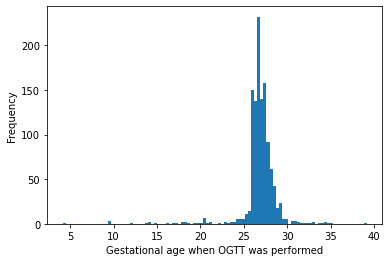

In [11]:
plt.hist(df['m_ogtt_gestationalweek'], 100)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga', dpi=100)
plt.show()

In [12]:
df['m_ogtt_gestationalweek'].describe()

count    1162.000000
mean       26.833029
std         2.129868
min         4.140000
25%        26.430000
50%        26.860000
75%        27.570000
max        39.140000
Name: m_ogtt_gestationalweek, dtype: float64

In [13]:
df_24wks = df[df['m_ogtt_gestationalweek'] < 24]
print(df_24wks.shape)

(36, 1557)


In [14]:
df_29wksogtt = df[df['m_ogtt_gestationalweek'] >= 29]
print(df_29wksogtt.shape)

(54, 1557)


Removing subjects who are less than 24 weeks or more than 29 weeks of gestational age when OGTT was performed

In [15]:
df = df.drop(df[(df.m_ogtt_gestationalweek < 24)].index)
df = df.drop(df[(df.m_ogtt_gestationalweek >= 29)].index)

In [16]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 16.3+ MB


bw_zscore_Lancet2011                                 1088
bw_percentile_Lancet2011                             1088
size_at_birth_Lancet2011                             1088
LGA_Lancet2011_bin                                   1088
children_at_home                                     1258
working_situation                                     658
childcare_arr_1                                       406
childcare_arr_1_specify                                31
childcare_arr_1_recoded                               406
childcare_arr_2                                       406
childcare_arr_2_specify                                38
childcare_arr_2_recoded                               406
childcare_arr_3                                       406
childcare_arr_3_specify                                13
childcare_arr_3_recoded                               406
number_weeks_been_pregnant                           1107
was_pregnancy_planned                                1116
was_pregnancy_

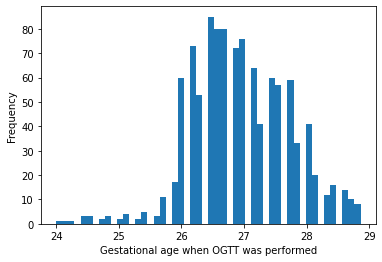

In [17]:
plt.hist(df['m_ogtt_gestationalweek'], 50)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga_2428', dpi=100)
plt.show()

In [18]:
df['m_ogtt_gestationalweek'].describe()

count    1072.000000
mean       26.938293
std         0.784757
min        24.000000
25%        26.430000
50%        26.860000
75%        27.570000
max        28.860000
Name: m_ogtt_gestationalweek, dtype: float64

In [19]:
df.rename(columns=
          {'PAI-1': 'PAI1', 'MCP-1': 'MCP1', 'IGF-I': 'IGFI', 'IGF-II': 'IGFII', 'IGFBP-1': 'IGFBP1', 'IGFBP-3': 'IGFBP3', 'IGFBP-7': 'IGFBP7', 'C-Peptide': 'CPeptide', 'IGFBP-4': 'IGFBP4'}, inplace=True)

In [20]:
df.rename(columns=
          {'ppBMI_WHO_obesity_bin': 'Obesity', 'family_history_DM_binary_pw11': 'Family history of diabetes mellitus', 'pw11_any_gdm_outcome_cat': 'Previous history of GDM', 'pw11_history_macrosomia_cat': 'Previous history of macrosomia', 'm_ethnicity_indian_bin': 'Indian vs Chinese/Malay ethnicity', 'm_ethnicity_malay_bin': 'Malay vs Chinese/Indian ethnicity', 'm_ethnicity_chinese_bin': 'Chinese vs Malay/Indian ethnicity', 'mother_age_recruitment': 'Maternal age', 'm_height_pw26': 'Maternal height', 'parity_2cat': 'Parity', 'map_est_first_antenatal': 'Mean arterial blood pressure at booking appointment', 'm_HEI_dairy_pw26': 'Dairy intake', 'm_HEI_total_protein_foods_pw26': 'Total protein food intake', 'm_HEI_total_fats_pw26': 'Total fats intake', 'm_HEI_total_grains&_tubers_pw26': 'Total rice & alternatives intake', 'alcohol_consumption_preg': 'Alcohol consumption during pregnancy', 'self_reported_smoking_2cat_pw26': 'Smoking during pregnancy'}, inplace=True)


Importing scikit-learn machine learning packages and modules

In [21]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from statistics import mean, stdev

Multiethnic model (Chinese, Malay, Indian)

In [22]:
df1=df.dropna(subset=['Mean arterial blood pressure at booking appointment', 'Maternal age', 'Previous history of GDM', 'Malay vs Chinese/Indian ethnicity', 'Maternal height', 'Adiponectin', 'IGFI', 'Dairy intake', 'Total rice & alternatives intake', 'm_gdm_who_1999_cat'])


In [23]:
df1.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04020                  0.34                     63.40   
010-04022                  0.63                     73.61   
010-04023                  2.08                     98.12   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04020                      AGA                 0.0             0_no   
010-04022                      AGA                 0.0            1_yes   
010-04023                      LGA                 1.0             0_no   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04020               NaN             NaN                     NaN   
010-04022         stay_home             NaN                     NaN   
010-04023               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04020                     NaN             NaN                     NaN   
010-04022                     NaN             NaN                     NaN   
010-04023                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04020                     NaN             NaN                     NaN   
010-04022                     NaN             NaN                     NaN   
010-04023                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04020                     NaN                         5.0   
010-04022                     NaN                         6.0   
010-04023                     NaN                         2.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04020                  0_no                           0.0            NaN   
010-04022                 1_yes                           1.0           0_no   
010-04023                 1_yes                           1.0          1_yes   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04020     no_contraception                           NaN   
010-04022                  NaN                           NaN   
010-04023                  NaN                           NaN   

          con

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 10.8+ MB


Drop rows of pandas dataframe whose value is NaN 

In [25]:
df2 = df1[['Mean arterial blood pressure at booking appointment', 'Maternal age', 'Previous history of GDM', 'Malay vs Chinese/Indian ethnicity', 'm_gdm_who_1999_cat']]


In [26]:
df2.head()

,Mean arterial blood pressure at booking appointment,Maternal age,Previous history of GDM,Malay vs Chinese/Indian ethnicity,m_gdm_who_1999_cat
SubjectID,,,,,
010-04004,97.3,29.43,0.0,1.0,0.0
010-04006,101.3,27.53,0.0,0.0,0.0
010-04020,70.0,38.72,0.0,0.0,0.0
010-04022,92.0,35.97,0.0,0.0,1.0
010-04023,76.3,34.21,0.0,0.0,0.0


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Data columns (total 5 columns):
Mean arterial blood pressure at booking appointment    909 non-null float64
Maternal age                                           909 non-null float64
Previous history of GDM                                909 non-null float64
Malay vs Chinese/Indian ethnicity                      909 non-null float64
m_gdm_who_1999_cat                                     909 non-null float64
dtypes: float64(5)
memory usage: 42.6+ KB


GDM status in GUSTO complete dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [28]:
df2['m_gdm_who_1999_cat'].value_counts(dropna=False)

0.0    755
1.0    154
Name: m_gdm_who_1999_cat, dtype: int64

Calculating the prevalence of GDM (%) in complete dataset

In [29]:
(154/(755+154))*100

16.94169416941694

Generating X & Y matrices

In [30]:
X=df2.loc[:, df2.columns != 'm_gdm_who_1999_cat']
y=df2.loc[:, df2.columns == 'm_gdm_who_1999_cat']

In [31]:
X.columns

Index(['Mean arterial blood pressure at booking appointment', 'Maternal age',
       'Previous history of GDM', 'Malay vs Chinese/Indian ethnicity'],
      dtype='object')

Create the Catboost classifier object

In [32]:
import catboost as cb
clf = cb.CatBoostClassifier(thread_count=1)

Create the grid search parameter grid

In [33]:
clf_param_grid = {
          'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3],
          'l2_leaf_reg':[1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
          'random_strength':[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
}

In [34]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.10, random_state=0)
grid_ni4f_auc_cb = GridSearchCV(estimator=clf, param_grid=clf_param_grid, scoring='roc_auc', cv=sss, verbose=1, n_jobs=40)

Fit the estimator

In [35]:
grid_ni4f_auc_cb.fit(MaxAbsScaler().fit_transform(X), y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  8.8min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed: 14.1min
[Parallel(n_jobs=40)]: Done 1620 out of 1620 | elapsed: 19.4min finished


0:	learn: 0.6925325	total: 81.5ms	remaining: 1m 21s
1:	learn: 0.6918384	total: 104ms	remaining: 52s
2:	learn: 0.6911964	total: 128ms	remaining: 42.6s
3:	learn: 0.6905590	total: 151ms	remaining: 37.5s
4:	learn: 0.6898718	total: 174ms	remaining: 34.7s
5:	learn: 0.6892801	total: 194ms	remaining: 32.1s
6:	learn: 0.6885606	total: 218ms	remaining: 30.9s
7:	learn: 0.6879127	total: 242ms	remaining: 30s
8:	learn: 0.6872543	total: 266ms	remaining: 29.2s
9:	learn: 0.6867039	total: 284ms	remaining: 28.1s
10:	learn: 0.6860385	total: 308ms	remaining: 27.7s
11:	learn: 0.6854885	total: 326ms	remaining: 26.8s
12:	learn: 0.6849418	total: 344ms	remaining: 26.1s
13:	learn: 0.6843248	total: 362ms	remaining: 25.5s
14:	learn: 0.6836633	total: 383ms	remaining: 25.2s
15:	learn: 0.6830051	total: 404ms	remaining: 24.9s
16:	learn: 0.6824605	total: 416ms	remaining: 24.1s
17:	learn: 0.6817935	total: 437ms	remaining: 23.8s
18:	learn: 0.6811929	total: 458ms	remaining: 23.6s
19:	learn: 0.6805738	total: 478ms	remaining

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.1,
            train_size=None),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f389e153050>,
             n_jobs=40,
             param_grid={'l2_leaf_reg': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                         'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.03,
                                           0.05, 0.1, 0.2, 0.3],
                         'random_strength': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]},
             scoring='roc_auc', verbose=1)

Compute metrics

In [36]:
AUC = grid_ni4f_auc_cb.best_score_

In [37]:
AUC

0.8201754385964912

In [38]:
print(grid_ni4f_auc_cb.best_params_)
print(grid_ni4f_auc_cb.best_estimator_)

{'l2_leaf_reg': 6.0, 'learning_rate': 0.001, 'random_strength': 4.0}


In [39]:
std = grid_ni4f_auc_cb.cv_results_['std_test_score'][grid_ni4f_auc_cb.best_index_]

In [40]:
std

0.05581870579189321

In [41]:
print("AUC: %0.3f (+/- %0.3f)" % (AUC, std * 1.96))

AUC: 0.820 (+/- 0.109)


Feature importance in Catboost - create a pandas series of feature importance

In [42]:
grid_ni4f_auc_cb.best_estimator_.feature_importances_

array([27.5007971 , 32.88396896, 15.12547809, 24.48975585])

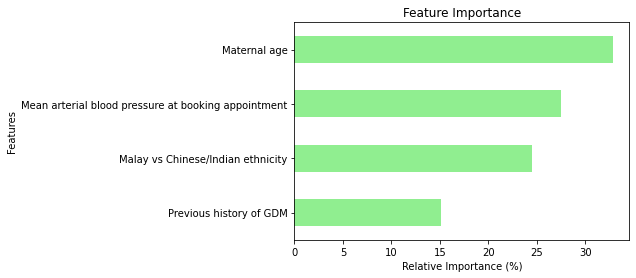

In [43]:
importances_cb_cl = pd.Series(grid_ni4f_auc_cb.best_estimator_.feature_importances_, index = X.columns)
sorted_importances_cb_cl = importances_cb_cl.sort_values()  
sorted_importances_cb_cl.plot(kind='barh', color='lightgreen')
plt.xlabel('Relative Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('catboost_ni4f_auc', bbox_inches='tight', dpi=300)

Shap values to interpret the CatBoost models 

In [44]:
import shap

Explain the model's predictions on the entire dataset

In [45]:
shap_values = shap.TreeExplainer(grid_ni4f_auc_cb.best_estimator_).shap_values(X)

SHAP Summary Plot - The SHAP values for CatBoost explain the margin output of the model, which is the change in log odds of being diagnosed with GDM (general overview of each feature)

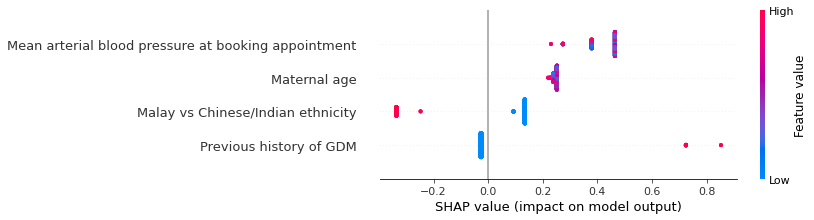

<Figure size 1440x1440 with 0 Axes>

In [46]:
shap.summary_plot(shap_values, X)
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('ni4f_auc_cb_shap', bbox_inches='tight', dpi=300)

Save the best model as a 'Pickle' - saving the pickled model as a file

In [47]:
# Output a pickle file for the model
import pickle
pickle.dump(grid_ni4f_auc_cb.best_estimator_, open('ni4f_auc_cb', 'wb'))